In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Load dataset with selected categories
categories = ['rec.sport.baseball', 'rec.sport.hockey', 'sci.med', 'sci.space']  # Fewer categories for simplicity
newsgroups_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Create a DataFrame for easier handling
data = pd.DataFrame({'text': newsgroups_data.data, 'category': newsgroups_data.target})
data['category_name'] = data['category'].apply(lambda x: newsgroups_data.target_names[x])

print('Show a preview')
display(data.head())

________________________________________________________________________________
Cache loading failed
________________________________________________________________________________
No module named 'numpy._core'
Show a preview


,text,category,category_name
0,\nA freeze dried Tootsie Roll (tm). The actua...,3,sci.space
1,\n\n\n Hmmm...what about walks and SB? Baerga ...,0,rec.sport.baseball
2,: >\n: >ATLANTIC DIVISION\n: >\t\n: >\tST JOHN...,1,rec.sport.hockey
3,\n\n INTENSIVE JAPANESE AT THE UNIVERSITY O...,2,sci.med
4,\n\n\n\n\nWhen I was at the Texas Star Party a...,3,sci.space


In [ ]:
# Download necessary resources for preprocessing
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/arifmoazy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arifmoazy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arifmoazy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])  # Test if stopwords are accessible

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Show a preview of the cleaned text
display(data[['text', 'cleaned_text']].head())


,text,cleaned_text
0,\nA freeze dried Tootsie Roll (tm). The actua...,freeze dried tootsie roll tm actual taste sens...
1,\n\n\n Hmmm...what about walks and SB? Baerga ...,hmmmwhat walk sb baerga got clobbered alomar o...
2,: >\n: >ATLANTIC DIVISION\n: >\t\n: >\tST JOHN...,atlantic division st john maple leaf v moncton...
3,\n\n INTENSIVE JAPANESE AT THE UNIVERSITY O...,intensive japanese university pittsburgh summe...
4,\n\n\n\n\nWhen I was at the Texas Star Party a...,texas star party year ago sky dark venus indee...


In [34]:
# saving the cleaned data in a csv file

data[['cleaned_text', 'category_name']].to_csv('../dataset/cleaned_newsgroups_data.csv', index=False)

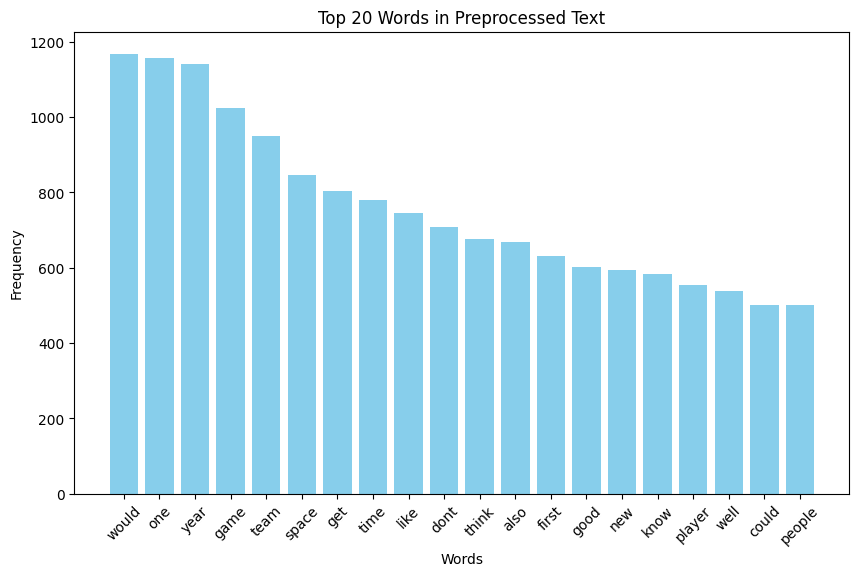

In [4]:
# Visualize the Preprocessed Data
from collections import Counter
import matplotlib.pyplot as plt

# Combine all text for word frequency
all_text = ' '.join(data['cleaned_text'])
word_freq = Counter(all_text.split())

# Top 20 words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Preprocessed Text')
plt.xticks(rotation=45)
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

The Bag-of-Words (BoW) method converts text into a sparse matrix of token counts.

- Initialize the CountVectorizer to transform the cleaned text into a BoW matrix.
- Limit the number of features to the top 1000 words to reduce computation.

In [6]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# Apply CountVectorizer to the cleaned text
bow_matrix = count_vectorizer.fit_transform(data['cleaned_text'])

# Convert to a DataFrame for visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

print("Bag-of-Words Matrix (sample):")
display(bow_df.head())


Bag-of-Words Matrix (sample):


,abc,ability,able,access,according,acid,acquired,activity,actually,adam,...,wrong,yankee,yeah,year,yes,york,youd,young,youre,zone
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


The TF-IDF method adjusts token counts by assigning higher importance to rare words.

- Initialize the TfidfVectorizer to transform the cleaned text.
- Limit the number of features (same as BoW for comparison).

Note:
TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [7]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Apply TfidfVectorizer to the cleaned text
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Convert to a DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Matrix (sample):")
display(tfidf_df.head())

TF-IDF Matrix (sample):


,abc,ability,able,access,according,acid,acquired,activity,actually,adam,...,wrong,yankee,yeah,year,yes,york,youd,young,youre,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167473,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.051962,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.036165,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.110498,0.0,0.0,0.0,0.0,0.0,0.0


### Compare BoW and TF-IDF

- BoW shows raw word counts.
- TF-IDF weighs words based on frequency across all documents.

In [8]:
# Print sample word weights from TF-IDF
sample_words = tfidf_df.columns[:10]
print(f"Sample TF-IDF scores for words: {sample_words}")
display(tfidf_df[sample_words].head())

Sample TF-IDF scores for words: Index(['abc', 'ability', 'able', 'access', 'according', 'acid', 'acquired',
       'activity', 'actually', 'adam'],
      dtype='object')


,abc,ability,able,access,according,acid,acquired,activity,actually,adam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167473,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


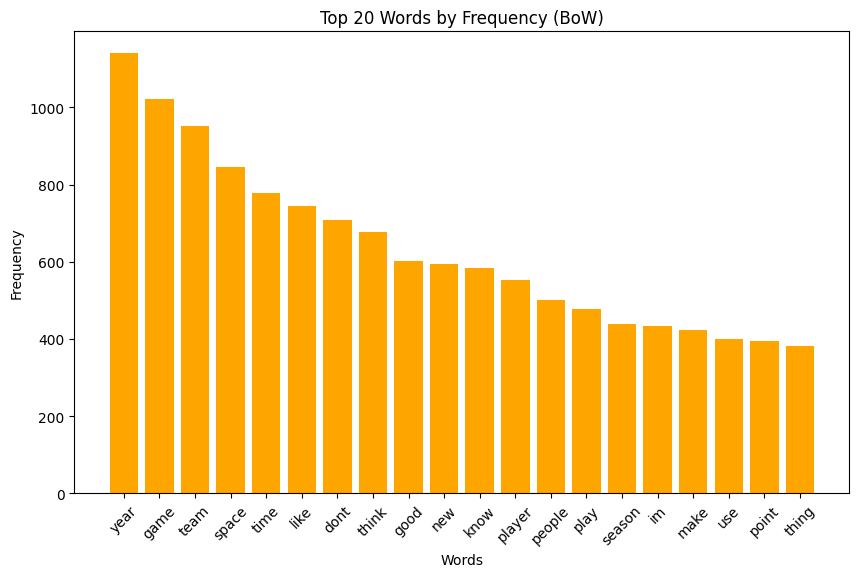

In [9]:
# Visualize Most Frequent Words

# Get top 20 words by frequency
word_freq = bow_df.sum(axis=0).sort_values(ascending=False)[:20]
words = word_freq.index
counts = word_freq.values

# Plot the frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency (BoW)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


In [14]:
import numpy as np
import pyLDAvis
# import pyLDAvis.sklearn


In [15]:
# Number of topics to extract
num_topics = 4

# Initialize the LDA model
lda_model = LatentDirichletAllocation(
    n_components=num_topics,          # Number of topics
    max_iter=10,                      # Maximum number of iterations
    learning_method='online',         # Update method
    random_state=42,                  # Reproducibility
    n_jobs=-1                         # Use all available CPUs
)

# Fit the LDA model on the Bag-of-Words matrix
lda_model.fit(bow_matrix)

print(f"Model training complete. Extracted {num_topics} topics.")


Model training complete. Extracted 4 topics.


In [16]:
# interpret the topics
# Get feature names (words) from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
     for topic_idx, topic in enumerate(model.components_):
          top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
          print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

# Display the top 10 words for each topic
display_topics(lda_model, feature_names, 10)


Topic #1: people, time, know, dont, use, year, like, problem, day, patient
Topic #2: space, launch, satellite, nasa, mission, orbit, data, earth, year, lunar
Topic #3: team, game, year, player, season, think, good, like, dont, league
Topic #4: game, pt, period, play, goal, new, la, shot, power, st


Assign topics to the documents

In [19]:
# Get topic distribution for each document
doc_topic_matrix = lda_model.transform(bow_matrix)

# Assign the most probable topic to each document
data['dominant_topic'] = np.argmax(doc_topic_matrix, axis=1)

# Map topic numbers to labels for better readability
topic_labels = {0: 'Topic 1', 1: 'Topic 2', 2: 'Topic 3', 3: 'Topic 4'}
data['topic_label'] = data['dominant_topic'].map(topic_labels)

# Preview the dataset with the assigned topics
display(data[['cleaned_text', 'dominant_topic', 'topic_label']].head(10))

,cleaned_text,dominant_topic,topic_label
0,freeze dried tootsie roll tm actual taste sens...,2,Topic 3
1,hmmmwhat walk sb baerga got clobbered alomar o...,2,Topic 3
2,atlantic division st john maple leaf v moncton...,2,Topic 3
3,intensive japanese university pittsburgh summe...,0,Topic 1
4,texas star party year ago sky dark venus indee...,0,Topic 1
5,indeed extreme example came nowhere connection...,0,Topic 1
6,well actually based really happened based fant...,2,Topic 3
7,except fact seems lot high scoring al game als...,2,Topic 3
8,thing detected space anyone looked possible pr...,0,Topic 1
9,hi im writing science fiction script im lookin...,0,Topic 1


In [25]:
import pyLDAvis.lda_model

Visualize the topics

In [26]:
# Prepare the visualization
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.lda_model.prepare(lda_model, bow_matrix, count_vectorizer, mds='tsne')

# Display the visualization
pyLDAvis.display(lda_vis)


### Assign Topics to Documents (TF-IDF)
To assign a topic to each document, we will find the topic with the highest probability for each document.

In [27]:
# Get topic distribution for each document
doc_topic_matrix_tf_idf = lda_model.transform(tfidf_matrix)

# Assign the most probable topic to each document
data['dominant_topic_tf_idf'] = np.argmax(doc_topic_matrix_tf_idf, axis=1)

# Map topic numbers to labels for better readability
topic_labels = {0: 'Topic 1', 1: 'Topic 2', 2: 'Topic 3', 3: 'Topic 4'}
data['topic_label'] = data['dominant_topic_tf_idf'].map(topic_labels)

# Preview the dataset with the assigned topics
display(data[['cleaned_text', 'dominant_topic_tf_idf', 'topic_label']].head())


,cleaned_text,dominant_topic_tf_idf,topic_label
0,freeze dried tootsie roll tm actual taste sens...,2,Topic 3
1,hmmmwhat walk sb baerga got clobbered alomar o...,2,Topic 3
2,atlantic division st john maple leaf v moncton...,2,Topic 3
3,intensive japanese university pittsburgh summe...,0,Topic 1
4,texas star party year ago sky dark venus indee...,0,Topic 1


In [28]:
# Prepare the visualization
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.lda_model.prepare(lda_model, tfidf_matrix, tfidf_vectorizer, mds='tsne')

# Display the visualization
pyLDAvis.display(lda_vis)
